<a href="https://colab.research.google.com/github/Anisha-singh2207/Anisha-singh2207/blob/main/PCA%20practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Univariate Feature Imputation

Simple imputer provides the basic strategies for imputing missing values.Missing values can be imputed with a provided constant value or using stastics (mean,mode,median) of each column in which the missing values are located

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
X=np.array([[np.nan,2],[6,np.nan],[7,6]])
X

array([[nan,  2.],
       [ 6., nan],
       [ 7.,  6.]])

In [ ]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
imp.fit_transform(X)


array([[6.5, 2. ],
       [6. , 4. ],
       [7. , 6. ]])

In [ ]:
# for categorical features
df=pd.DataFrame([["a","x"],[np.nan,"y"],["a",np.nan],["b","y"]],dtype="category")

In [ ]:
df

,0,1
0,a,x
1,NaN,y
2,a,NaN
3,b,y


In [ ]:
imp_1=SimpleImputer(strategy="most_frequent")
imp_1.fit_transform(df)

array([['a', 'x'],
       ['a', 'y'],
       ['a', 'y'],
       ['b', 'y']], dtype=object)

Multivariate Feature Imputation

Iterative Imputer class which models each feature with missing values as a function of other feature and uses that estimate for imputation

In [ ]:
X

array([[nan,  2.],
       [ 6., nan],
       [ 7.,  6.]])

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_iter=IterativeImputer(max_iter=10,random_state=10)
imp_iter.fit_transform(X)

array([[5.000012, 2.      ],
       [6.      , 3.999988],
       [7.      , 6.      ]])

Nearest neighbour Imputer

In [ ]:
Y=np.array([[1,2,np.nan],[3,4,3],[np.nan,6,5],[8,8,7]])

In [ ]:
Y

array([[ 1.,  2., nan],
       [ 3.,  4.,  3.],
       [nan,  6.,  5.],
       [ 8.,  8.,  7.]])

In [ ]:
from sklearn.impute import KNNImputer
imp_knn=KNNImputer(n_neighbors=2,weights="uniform")
imp_knn.fit_transform(Y)


array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# load the data set
from sklearn.datasets import load_breast_cancer


In [20]:
cancer_data=load_breast_cancer()
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [22]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [24]:
df=pd.DataFrame(cancer_data["data"],columns=cancer_data["feature_names"])

In [25]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [32]:
# scaling the dara
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [33]:
scaled_data=scaler.transform(df)

In [34]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [37]:
# applying PCA algorithm
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
data_pca=pca.fit_transform(scaled_data)

In [38]:
data_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [40]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

Text(0, 0.5, 'Second Principal Component')

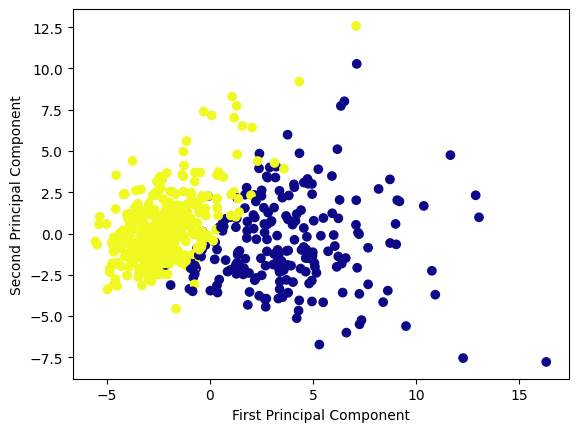

In [41]:
plt.scatter(data_pca[:,0],data_pca[:,1],c=cancer_data["target"],cmap="plasma")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
